In [20]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons

In [47]:
X,y = make_moons(n_samples=100,noise=0.15,random_state=42)

In [48]:
df = pd.read_csv('/content/DailyDelhiClimate.csv')

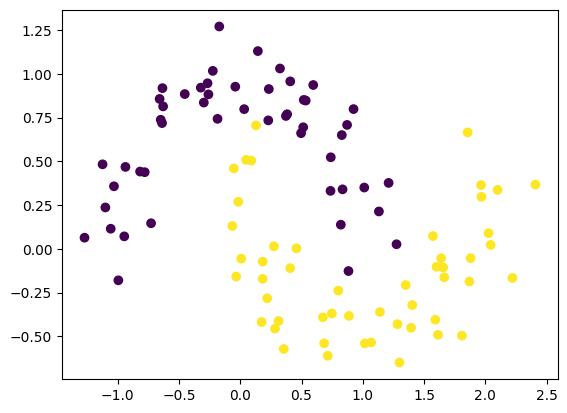

In [49]:
plt.scatter(x=X[:,0],y=X[:,1],c=y)

In [50]:
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [28]:
X_train

array([[ 1.3506206 , -0.20663883],
       [-0.04098885,  0.92712414],
       [-0.9379972 ,  0.46846678],
       [ 0.73645602,  0.3315385 ],
       [ 2.40938072,  0.36744482],
       [ 1.21073294,  0.37721455],
       [-0.99578508, -0.17956306],
       [ 1.01642634, -0.54001915],
       [ 0.88304472, -0.12658445],
       [ 0.2196007 , -0.28235199],
       [-0.32279169,  0.92145523],
       [ 0.14332957,  1.13048376],
       [-0.01658646,  0.26904656],
       [ 0.73867736,  0.52356398],
       [ 1.40382802, -0.32089592],
       [-0.65891281,  0.857088  ],
       [-1.27201559,  0.064055  ],
       [ 0.67403854, -0.39105811],
       [ 0.8346617 ,  0.34040713],
       [ 1.13998191, -0.36088456],
       [ 0.51814426,  0.85146409],
       [ 2.22167197, -0.16625369],
       [ 1.39439184, -0.45063627],
       [ 0.18250721, -0.17104312],
       [ 2.02675758,  0.09006383],
       [-0.26038715,  0.88295876],
       [ 1.63958277, -0.0533336 ],
       [ 0.40767679,  0.9574049 ],
       [ 0.12784118,

In [53]:
from keras.layers import Dense
from keras.models import Sequential

In [62]:
model = Sequential()

In [63]:
model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [64]:
# first apply simple SGD
sgd = keras.optimizers.SGD(
    learning_rate=0.01,momentum=0.9,nesterov=False,name='SGD'
)

In [65]:
sgd

In [66]:
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
# normally    optimizer=adam

In [68]:

history1 = model.fit(X_train, y_train, epochs=50,validation_split=0.2)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8958 - loss: 0.2798 - val_accuracy: 0.7500 - val_loss: 0.4579
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9167 - loss: 0.2431 - val_accuracy: 0.7500 - val_loss: 0.4592
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8958 - loss: 0.2873 - val_accuracy: 0.7500 - val_loss: 0.4541
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8958 - loss: 0.2743 - val_accuracy: 0.7500 - val_loss: 0.4494
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9062 - loss: 0.2675 - val_accuracy: 0.7500 - val_loss: 0.4443
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8854 - loss: 0.2786 - val_accuracy: 0.7500 - val_loss: 0.4434
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8854 - loss: 0.2894 - val_accuracy: 0.7500 - val_loss: 0.4380
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8750 - loss: 0.2956 - val_accuracy: 0.7500 - val_loss: 0.4350


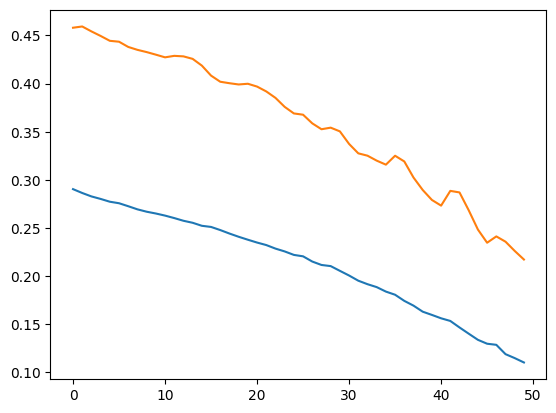

In [69]:

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

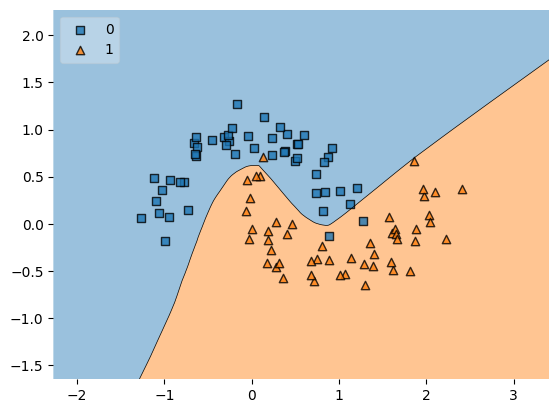

In [70]:

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [85]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [86]:
# first apply simple SGD
sgd = keras.optimizers.SGD(
    learning_rate=0.01,momentum=0.9,nesterov=True,name='SGD'
)

In [87]:
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
# normally    optimizer=adam

history = model.fit(X_train, y_train, epochs=50,validation_split=0.2)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 597ms/step - accuracy: 0.4062 - loss: 0.7115 - val_accuracy: 0.5000 - val_loss: 0.7017
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.3854 - loss: 0.7033 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.4375 - loss: 0.6939 - val_accuracy: 0.6875 - val_loss: 0.6869
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6146 - loss: 0.6860 - val_accuracy: 0.5625 - val_loss: 0.6839
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5417 - loss: 0.6839 - val_accuracy: 0.5625 - val_loss: 0.6819
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5625 - loss: 0.6813 - val_accuracy: 0.5625 - val_loss: 0.6798
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5312 - loss: 0.6806 - val_accuracy: 0.5625 - val_loss: 0.6771
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5938 - loss: 0.6743 - val_accuracy: 0.5625 - val_loss: 0.674

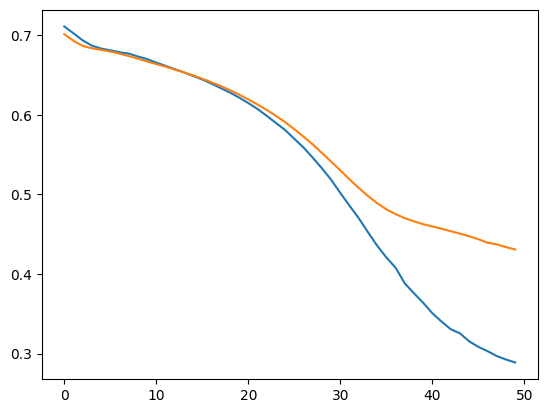

In [89]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

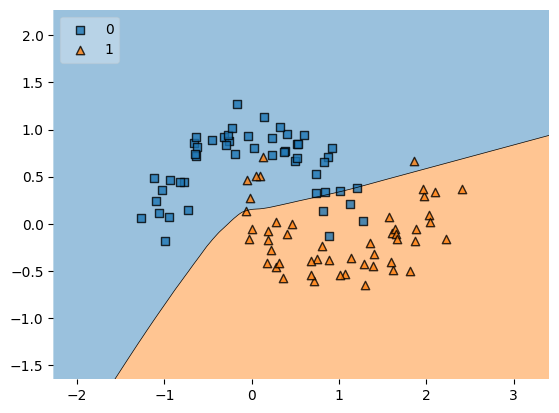

In [90]:

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)